### Business Problem

 ##### Bank has collected data from 5000 customers. The objective of this case study is to understand what's driving the total spend of credit card(Primary Card + Secondary card)

### Tasks: 
###### We have to priotize the drivers(factors) resulting in CC spend based on their importance. This will be useful in revising the CC limit for existing customers and setting-up appropriate CC limit to upcoming customers. 

In [1]:
## Importing required libaries [Reading and plotting the datasets]
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
## Setting up for max visualization on datasets
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)

In [3]:
## Setting-up the directories [Loading data]
## There are multiple sheets in dataset so cheking the sheets by sheets
## checking Data dictionary
custdata_details=pd.read_excel("study1.xlsx", sheet_name="Data Dictionary")
custdata_details

,Numeric Variable,Label,Unnamed: 2,Categorical Variable,Unnamed: 4,Label.1
0,custid,Customer ID,NaN,region,1,Zone 1
1,region,Geographic indicator,NaN,NaN,2,Zone 2
2,townsize,Size of hometown,NaN,NaN,3,Zone 3
3,gender,Gender,NaN,NaN,4,Zone 4
4,age,Age in years,NaN,NaN,5,Zone 5
5,agecat,Age category,NaN,townsize,1,"> 250,000"
6,birthmonth,Birth month,NaN,NaN,2,"50,000-249,999"
7,ed,Years of education,NaN,NaN,3,"10,000-49,999"
8,edcat,Level of education,NaN,NaN,4,"2,500-9,999"
9,jobcat,Job category,NaN,NaN,5,"< 2,500"


In [4]:
custdata_details.shape

(443, 6)

In [5]:
custdata_details.head(132)

,Numeric Variable,Label,Unnamed: 2,Categorical Variable,Unnamed: 4,Label.1
0,custid,Customer ID,NaN,region,1,Zone 1
1,region,Geographic indicator,NaN,NaN,2,Zone 2
2,townsize,Size of hometown,NaN,NaN,3,Zone 3
3,gender,Gender,NaN,NaN,4,Zone 4
4,age,Age in years,NaN,NaN,5,Zone 5
5,agecat,Age category,NaN,townsize,1,"> 250,000"
6,birthmonth,Birth month,NaN,NaN,2,"50,000-249,999"
7,ed,Years of education,NaN,NaN,3,"10,000-49,999"
8,edcat,Level of education,NaN,NaN,4,"2,500-9,999"
9,jobcat,Job category,NaN,NaN,5,"< 2,500"


###### Checking this sheet gives a details idea about the variables with proper description  

In [6]:
## Loading actual dataset to be studied
custdata_df_org=pd.read_excel("study1.xlsx", sheet_name="customer_dbase")
custdata_df_org

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,carditems,cardspent,card2items,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,5,81.66,4,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.10,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,5,42.60,2,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.00,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,9,184.22,7,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,17,340.99,1,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,8,255.10,7,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.00,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,2,2.0,0,68,6,January,10,1,1,0,24,5,0,196,5.278115,5,8.0,7.934080,2.071167,7.745920,2.047

In [7]:
custdata_df_org.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,carditems,cardspent,card2items,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,5,81.66,4,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,5,42.60,2,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,9,184.22,7,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,17,340.99,1,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,8,255.10,7,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [8]:
custdata_df_org.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth', 'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03'], dtype='object', length=132)

In [9]:
custdata_df_org.describe(include="all")

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,carditems,cardspent,card2items,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000,5000.00000,4998.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4998.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,4997.000000,5000.000000,5000.000000,2378.000000,5000.000000,2378.000000,5000.000000,5000.000000,1704.000000,5000.000000,1704.000000,5000.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.00000,5000.000000,1344.000000,5000.000000,1344.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
unique,5000,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3491-OKPJLS-IP6,NaN,NaN,NaN,NaN,NaN,September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

##### Decribe function defines the below points
1.As we can see difference in count >> missing values present in dataset 

2.Include(=all) can classify the data into categorical and numerical columns.

4.Unique gives us the unique value counts in categorical variable.

In [10]:
custdata_df_org.describe(include="object")

,custid,birthmonth
count,5000,5000
unique,5000,12
top,3491-OKPJLS-IP6,September
freq,1,458


###### It provides with basic ideas about the data sheet columns and variable names 

In [11]:
## Creating a copy of data for further analysis [to avoid changes in actual dataset]
custdata_df= custdata_df_org.copy()
custdata_df.shape

(5000, 132)

In [12]:
## Setting the target variable [Adding the spends on both cards i.e. card1 & card 2]
custdata_df['totalspend'] = custdata_df['cardspent'] + custdata_df['card2spent']

In [13]:
# # Now checking Data audit reports with pandas profiling

# import pandas_profiling
# pandas_profiling.ProfileReport(custdata_df)

In [14]:
## Dropping the target variables and unique details>> i.e. columns not useful for this casestudy 
custdata_df.drop(["cardspent","card2spent","custid","birthmonth"],axis=1, inplace=True)

## Univariate Analysis

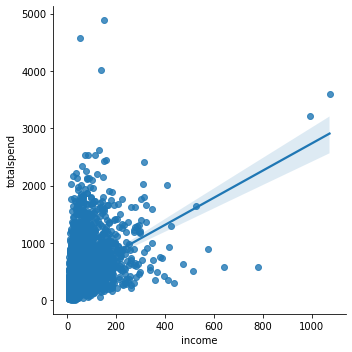

In [15]:
## Checking Linearity for target variable
sns.lmplot(x='income', y='totalspend', data=custdata_df)

##### >>>> With this Implot it shows our target variable i.e. "totalspend" is almost linear as most of the data points are along the line

In [16]:
## Seperating Numerical & catagorical variables
for x in ['region','townsize','gender','agecat','edcat','jobcat','union','employ','empcat','retire',
          'inccat','default','jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown',
          'cartype','carcatvalue','carbought','carbuy','commute','commutecat','commutecar',
          'commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk',
         'commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardtype','cardbenefit',
         'cardfee','cardtenure','cardtenurecat','card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat',
         'active','bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
         'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax',
        'news','response_01','response_02','response_03']:
    custdata_df[x]=custdata_df[x].astype('object')

In [17]:
# This will return a list
numeric_var_names = [key for key in dict(custdata_df.dtypes) if dict(custdata_df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Find Categorical variable in Data frame
cat_var_names = [key for key in dict(custdata_df.dtypes) if dict(custdata_df.dtypes)[key] in ['object']]

#Print the data frame
print("NUMERIC", numeric_var_names)
print("CATAGORICAL", cat_var_names)

NUMERIC ['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'carditems', 'card2items', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv', 'totalspend']
CATAGORICAL ['region', 'townsize', 'gender', 'agecat', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commut

## Outliers treatment
###### >>> For numerical variables only using clipping

In [18]:
## Numerical variables
custdata_df_num=custdata_df[numeric_var_names]
custdata_df_num.head(5)

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,carditems,card2items,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,totalspend
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,5,4,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,5,2,39,8.90,2.186051,330.60,5.800909,0.0,NaN,0.00,NaN,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,9,7,65,28.40,3.346389,1858.35,7.527444,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,17,1,36,6.00,1.791759,199.45,5.295564,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,8,7,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,NaN,0.0,NaN,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83


In [19]:
#custdata_df_num.describe().T

In [20]:
#Fiding outliers by setting up extra quartiles
oliers=custdata_df_num.describe(percentiles=[.01,.05,.1,.2,.25,.5,.75,.90,.95,.99]).T
oliers

,count,mean,std,min,1%,5%,10%,20%,25%,50%,75%,90%,95%,99%,max
age,5000.0,47.025600,17.770338,18.000000,18.000000,20.000000,23.000000,29.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,14.543000,3.281083,6.000000,8.000000,9.000000,10.000000,12.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
income,5000.0,54.759600,55.377511,9.000000,9.000000,13.000000,16.000000,21.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.010000,1073.000000
lninc,5000.0,3.699909,0.747072,2.197225,2.197225,2.564949,2.772589,3.044522,3.178054,3.637586,4.204693,4.692261,4.990433,5.605839,6.978214
debtinc,5000.0,9.954160,6.399783,0.000000,0.700000,1.900000,2.800000,4.400000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
creddebt,5000.0,1.857326,3.415732,0.000000,0.033160,0.101088,0.175682,0.316392,0.385520,0.926437,2.063820,4.299470,6.373010,14.280358,109.072596
lncreddebt,4999.0,-0.130454,1.273058,-6.597334,-3.401690,-2.291604,-1.737842,-1.149828,-0.952685,-0.076106,0.724665,1.458625,1.852297,2.658910,4.692014
othdebt,5000.0,3.654460,5.395172,0.000000,0.114299,0.287692,0.457997,0.815590,0.980301,2.098540,4.314780,8.062046,11.815981,24.064260,141.459150
lnothdebt,4999.0,0.696915,1.128578,-4.092107,-2.168241,-1.243483,-0.780312,-0.203707,-0.018987,0.741537,1.462053,2.087178,2.469586,3.180802,4.952011
spoused,5000.0,6.112800,7.743518,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.000000,16.000000,18.000000,20.000000,24.000000


#### The percentiles and quartiles shows the presence of outliers in dataset

In [21]:
## Removing outliers from NUmerical columns using clipping
# Lower boundary: 1%, upper boundary: 99%
custdata_df_num = custdata_df_num.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [22]:
#custdata_df_num.info

In [23]:
# Analysing Catagorical variables
custdata_df_cat=custdata_df[cat_var_names]
custdata_df_cat.head(5)

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,2,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5,0,2,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4,1,6,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3,0,2,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2,0,3,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


## Missing value treatment
#### Imputing with mean for Numerical columns
#### Imputing with Mode for Catagorical Columns

In [24]:
## Defining function >> Missing_imputation
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x
custdata_df_num = custdata_df_num.apply(lambda x: Missing_imputation(x))

In [25]:
def Missing_imputation(x):
    x = x.fillna(x.mode())
    return x

custdata_df_cat = custdata_df_cat.apply(lambda x: Missing_imputation(x))

In [26]:
custdata_df_num.isnull().sum().values.sum()

0

In [27]:
custdata_df_cat.isnull().sum().values.sum()

2

In [28]:
## After imputing all missing values dissappeared except two values
## dropping these rows as small in number which can't affect the analysis on considerable extent

In [29]:
## fiding rows with missing values
custdata_df_cat[custdata_df_cat['townsize'].isnull()==True]

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
961,1,NaN,1,4,4,3,0,12,4,0,4,0,5,0,-1,1,1,8,3,0,-1,-1,-1,-1,1,4,3,0,0,0,1,1,0,0,0,0,0,9,5,1,0,1,4,3,2,0,4,2,3,3,4,0,4,2,1,3,1,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
2731,5,NaN,1,6,3,6,0,20,5,1,1,0,3,1,2,1,1,37,5,1,1,1,1,0,0,4,3,0,0,0,1,0,0,0,0,0,0,9,4,0,0,0,5,3,2,0,10,3,2,2,3,0,7,3,1,3,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0


In [30]:
## Dropping
custdata_df_cat = custdata_df_cat.drop(961)
custdata_df_cat = custdata_df_cat.drop(2731)

In [31]:
custdata_df_cat[custdata_df_cat['townsize'].isnull()==True]

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03


###### Now missing values have been removed from the data set :)  

In [32]:
## Dummy Crearion for catagorical variables
custdata_df_cat.head(5)

,region,townsize,gender,agecat,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


In [33]:
## Defining Dummy Function >>> This will convert the catagorical columns in Numeric columns
## We may observe explosion in column counts >> Not so problamatic
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname)
    col_dummies.drop(col_dummies.columns[0], axis = 1, inplace = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [34]:
## Listing the catagorical variables
custdata_df_cat=custdata_df.select_dtypes(include=['object'])
cat_varlist=list(custdata_df_cat.columns)
cat_varlist

['region',
 'townsize',
 'gender',
 'agecat',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'inccat',
 'default',
 'jobsat',
 'marital',
 'spousedcat',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'active',
 'bfast',
 'churn',
 'tollfree',
 'equip',
 'callcard',
 'wireless',
 'multline',
 'voice',
 'pager',
 'internet',
 'callid',
 'callwait',
 'forward',
 'confer',
 'ebill',
 'owntv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownpc',
 'ownipod',
 'owngame',
 '

##### Dummification :) 

In [35]:
for c_feature in cat_varlist:
    custdata_df_cat[c_feature]=custdata_df_cat[c_feature].astype('category')
    custdata_df_cat=create_dummies(custdata_df_cat,c_feature)

C:\Users\Ashish Singh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
custdata_df_cat.head(5)

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,agecat_4,agecat_5,agecat_6,edcat_2,edcat_3,edcat_4,edcat_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,employ_15,employ_16,employ_17,employ_18,employ_19,employ_20,employ_21,employ_22,employ_23,employ_24,employ_25,employ_26,employ_27,employ_28,employ_29,employ_30,employ_31,employ_32,employ_33,employ_34,employ_35,employ_36,employ_37,employ_38,employ_39,employ_40,employ_41,employ_42,employ_43,employ_44,employ_45,employ_46,employ_47,employ_48,employ_49,employ_51,employ_52,empcat_2,empcat_3,empcat_4,empcat_5,retire_1,inccat_2,inccat_3,inccat_4,inccat_5,default_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,marital_1,spousedcat_1,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,homeown_1,hometype_2,hometype_3,hometype_4,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,address_18,address_19,address_20,address_21,address_22,address_23,address_24,address_25,address_26,address_27,address_28,address_29,address_30,address_31,address_32,address_33,address_34,address_35,address_36,address_37,address_38,address_39,address_40,address_41,address_42,address_43,address_44,address_45,address_46,address_47,address_48,address_49,address_50,address_51,address_52,address_53,address_54,address_55,address_57,addresscat_2,addresscat_3,addresscat_4,addresscat_5,cars_1,cars_2,cars_3,cars_4,cars_5,cars_6,cars_7,cars_8,carown_0,carown_1,cartype_0,cartype_1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carbought_0,carbought_1,carbuy_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,commutecat_2,commutecat_3,commutecat_4,commutecat_5,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_1,cardtenure_1,cardtenure_2,cardtenure_3,cardtenure_4,cardtenure_5,cardtenure_6,cardtenure_7,cardtenure_8,cardtenure_9,cardtenure_10,cardtenure_11,cardtenure_12,cardtenure_13,cardtenure_14,cardtenure_15,cardtenure_16,cardtenure_17,cardtenure_18,cardtenure_19,cardtenure_20,cardtenure_21,cardtenure_22,cardtenure_23,cardtenure_24,cardtenure_25,cardtenure_26,cardtenure_27,cardtenure_28,cardtenure_29,cardtenure_30,cardtenure_31,cardtenure_32,cardtenure_33,cardtenure_34,cardtenure_35,cardtenure_36,cardtenure_37,cardtenure_38,cardtenure_39,cardtenure_40,cardtenurecat_2,cardtenurecat_3,cardtenurecat_4,cardtenurecat_5,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_1,card2tenure_1,card2tenure_2,card2tenure_3,card2tenure_4,card2tenure_5,card2tenure_6,card2tenure_7,card2tenure_8,card2tenure_9,card2tenure_10,card2tenure_11,card2tenure_12,card2tenure_13,card2tenure_14,card2tenure_15,card2tenure_16,card2tenure_17,card2tenure_18,card2tenure_19,card2tenure_20,card2tenure_21,card2tenure_22,card2tenure_23,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,card2tenurecat_2,card2tenurecat_3,card2tenurecat_4,card2tenurecat_5,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [37]:
custdata_df_cat.shape

(5000, 345)

##### Column count changed from 83 to 345

In [38]:
#Now the data is ready [Outliers and missing values treated] 
# So merging numerical and categorical data to finallize the data using CONCATE function

custdata_df_new = pd.concat([custdata_df_num, custdata_df_cat], axis=1)

## Univariate analysis

### visualization of catagorical variables

In [39]:
custdata_df_cat.shape

(5000, 345)

In [40]:
custdata_df_cat.describe().T

,count,mean,std,min,25%,50%,75%,max
region_2,5000.0,0.1990,0.399288,0.0,0.0,0.0,0.00,1.0
region_3,5000.0,0.2006,0.400489,0.0,0.0,0.0,0.00,1.0
region_4,5000.0,0.1932,0.394848,0.0,0.0,0.0,0.00,1.0
region_5,5000.0,0.2054,0.404034,0.0,0.0,0.0,0.00,1.0
townsize_2.0,5000.0,0.2096,0.407064,0.0,0.0,0.0,0.00,1.0
townsize_3.0,5000.0,0.1814,0.385388,0.0,0.0,0.0,0.00,1.0
townsize_4.0,5000.0,0.1714,0.376896,0.0,0.0,0.0,0.00,1.0
townsize_5.0,5000.0,0.1500,0.357107,0.0,0.0,0.0,0.00,1.0
gender_1,5000.0,0.5036,0.500037,0.0,0.0,1.0,1.00,1.0
agecat_3,5000.0,0.1786,0.383055,0.0,0.0,0.0,0.00,1.0


[Text(0, 0.5, 'Frequency of Regions'), Text(0.5, 0, "Region's Name")]

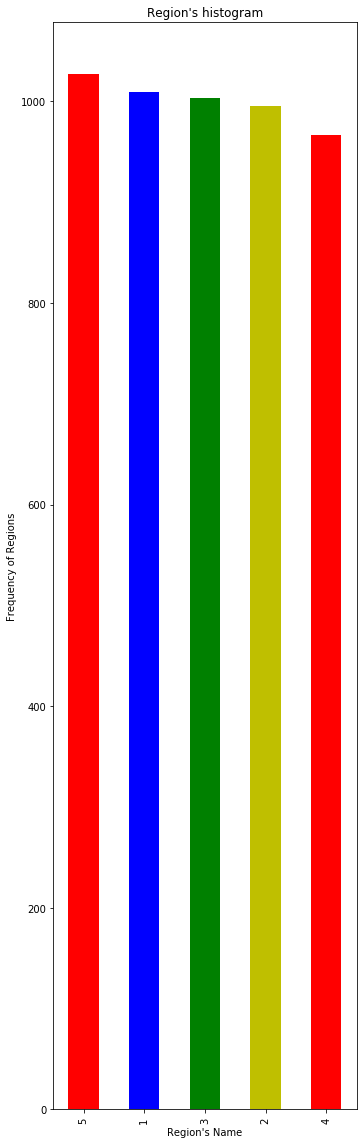

In [41]:
# Histograms
plt.figure(figsize=(25,20))

plt.subplot(1,4,1)
plt1=custdata_df.region.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("Region's histogram")
plt1.set(xlabel="Region's Name",ylabel="Frequency of Regions",)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'townsize')]

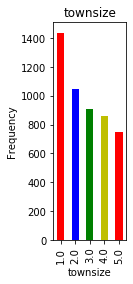

In [42]:
plt.subplot(1,4,2)
plt2=custdata_df.townsize.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("townsize")
plt2.set(xlabel="townsize",ylabel="Frequency")

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'gender')]

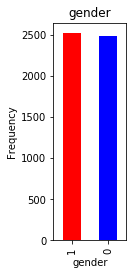

In [43]:
plt.subplot(1,4,3)
plt3=custdata_df.gender.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("gender")
plt3.set(xlabel="gender",ylabel="Frequency")

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'agecat')]

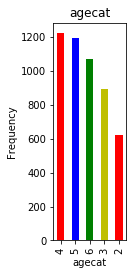

In [44]:
plt.subplot(1,4,4)
plt4=custdata_df.agecat.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("agecat")
plt4.set(xlabel="agecat",ylabel="Frequency")

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'default')]

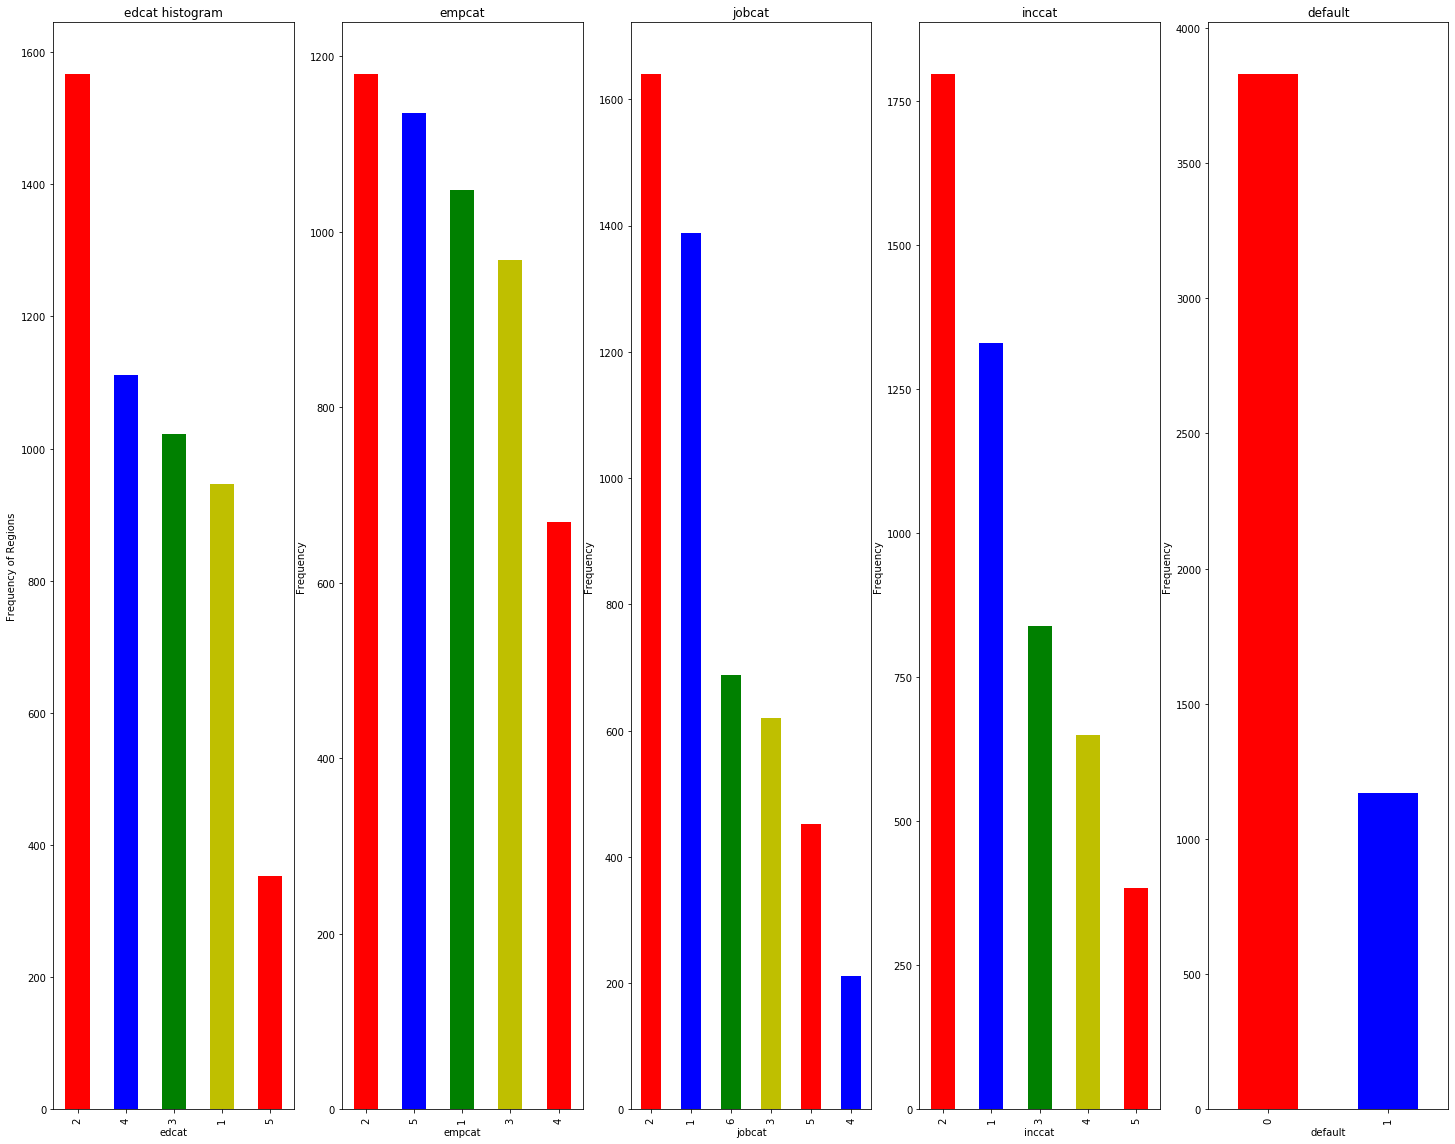

In [45]:
plt.figure(figsize=(25,20))

plt.subplot(1,5,1)
plt1=custdata_df.edcat.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("edcat histogram")
plt1.set(xlabel="edcat",ylabel="Frequency of Regions",)


plt.subplot(1,5,2)
plt2=custdata_df.empcat.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("empcat")
plt2.set(xlabel="empcat",ylabel="Frequency")

plt.subplot(1,5,3)
plt3=custdata_df.jobcat.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("jobcat")
plt3.set(xlabel="jobcat",ylabel="Frequency")


plt.subplot(1,5,4)
plt4=custdata_df.inccat.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("inccat")
plt4.set(xlabel="inccat",ylabel="Frequency")

plt.subplot(1,5,5)
plt4=custdata_df.default.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("default")
plt4.set(xlabel="default",ylabel="Frequency")

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'addresscat')]

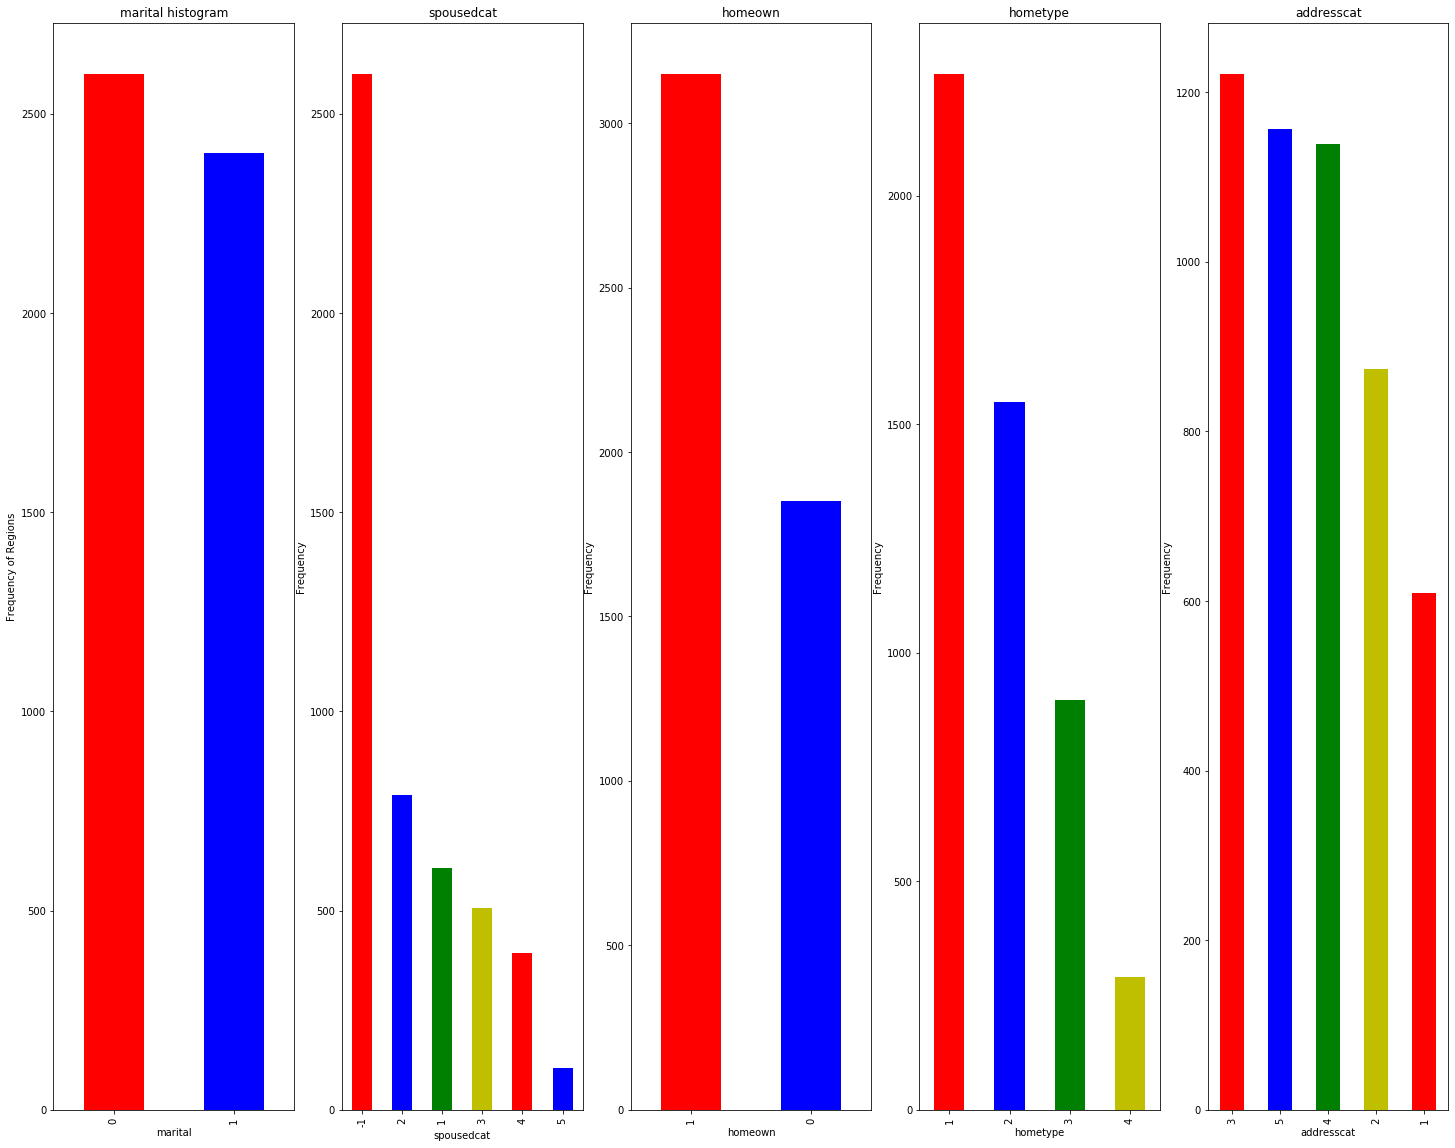

In [46]:
plt.figure(figsize=(25,20))

plt.subplot(1,5,1)
plt1=custdata_df.marital.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("marital histogram")
plt1.set(xlabel="marital",ylabel="Frequency of Regions",)


plt.subplot(1,5,2)
plt2=custdata_df.spousedcat.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("spousedcat")
plt2.set(xlabel="spousedcat",ylabel="Frequency")

plt.subplot(1,5,3)
plt3=custdata_df.homeown.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("homeown")
plt3.set(xlabel="homeown",ylabel="Frequency")


plt.subplot(1,5,4)
plt4=custdata_df.hometype.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("hometype")
plt4.set(xlabel="hometype",ylabel="Frequency")

plt.subplot(1,5,5)
plt4=custdata_df.addresscat.value_counts().plot(kind='bar',color=["r", "b","g","y"])
plt.title("addresscat")
plt4.set(xlabel="addresscat",ylabel="Frequency")

#### PiePlot for Cat data

In [47]:
custdata_df.inccat.value_counts()

2    1797
1    1330
3     839
4     650
5     384
Name: inccat, dtype: int64

([<matplotlib.patches.Wedge at 0x278a51f3b08>,
 [Text(-0.9492240198053816, 0.4488582852354545, '2'),
  Text(-0.0501207295288907, -1.0488030856512065, '1'),
  Text(1.0158540077152298, -0.2655948700726466, '3'),
  Text(0.9720911398613932, 0.78583637979097, '4'),
  Text(0.2508872473212849, 1.0195859890816215, '5')],
 [Text(-0.5424137256030752, 0.256490448705974, '35.94%'),
  Text(-0.028640416873651823, -0.5993160489435465, '26.60%'),
  Text(0.5804880044087026, -0.15176849718436947, '16.78%'),
  Text(0.6221383295112916, 0.5029352830662208, '13.00%'),
  Text(0.14336414132644854, 0.582620565189498, '7.68%')])

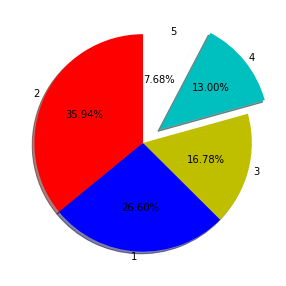

In [48]:
plt.figure(figsize=(6,5))
inc_cat=[1797,1330,839,650,384]
act=["2","1","3","4","5"]
col=["r","b","y","c","w"]
plt.pie(inc_cat, labels=act, labeldistance=1.05, autopct='%1.2f%%', shadow=True, 
        explode=[0,0,0,0.2,0], colors=col, startangle=90)

### visualization of Numerical variables

In [49]:
custdata_df_num.shape

(5000, 46)

In [50]:
custdata_df_num.columns

Index(['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'carditems', 'card2items', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv', 'totalspend'], dtype='object')

##### Distribution plot

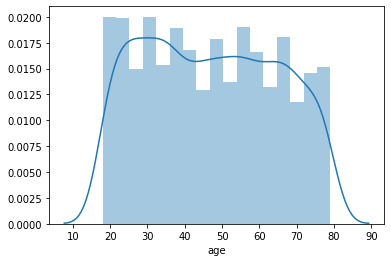

In [51]:
sns.distplot(custdata_df_num["age"])
plt.show()

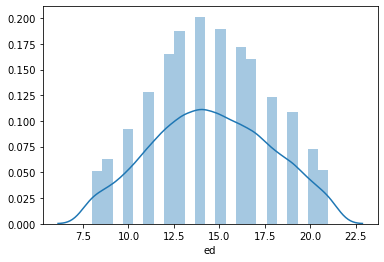

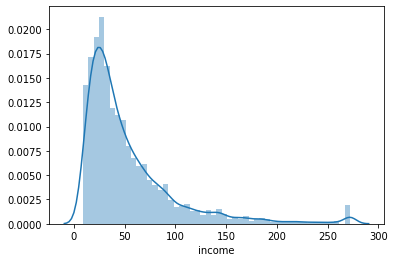

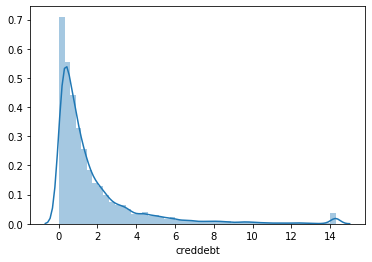

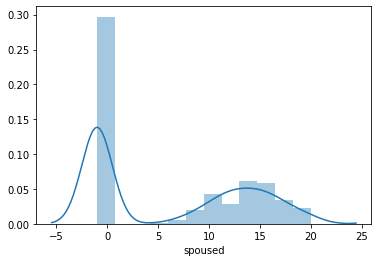

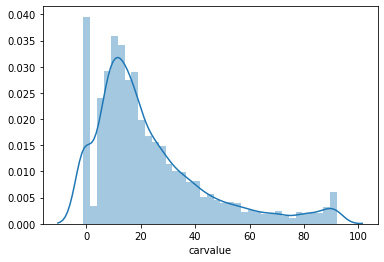

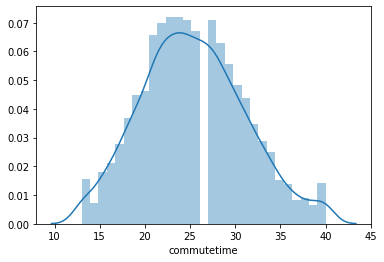

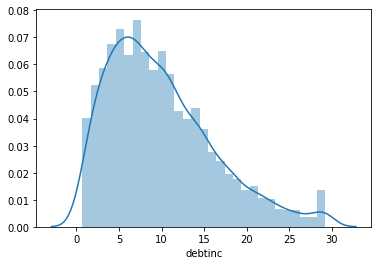

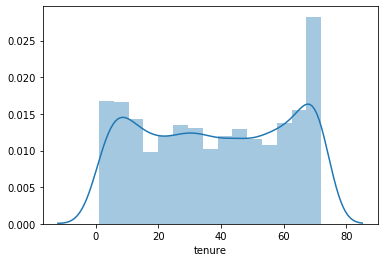

In [52]:
sns.distplot(custdata_df_num["ed"])
plt.show()

sns.distplot(custdata_df_num["income"])
plt.show()

sns.distplot(custdata_df_num["creddebt"])
plt.show()

sns.distplot(custdata_df_num["spoused"])
plt.show()

sns.distplot(custdata_df_num["carvalue"])
plt.show()

sns.distplot(custdata_df_num["commutetime"])
plt.show()

sns.distplot(custdata_df_num["debtinc"])
plt.show()

sns.distplot(custdata_df_num["tenure"])
plt.show()

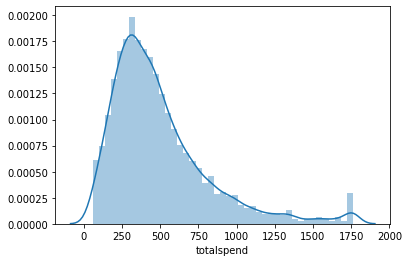

In [53]:
sns.distplot(custdata_df_num["totalspend"])


In [54]:
## Bivariate analysis [X vs Y]
## Catagorical to Numerical >> Boxplot and countplot
##Numerical to Numerical >> Implot and scatter plot

### Multivariate analysis

In [55]:
##sns.pairplot(custdata_df_num)

In [56]:
##The pairplot is taking a longer time and no output>> Large number of variables 46, Avoided 

## Feature Scaling 

In [57]:
from sklearn.preprocessing import MaxAbsScaler
max_sc=MaxAbsScaler()

In [58]:
custdata_df_num.shape

(5000, 46)

In [59]:
##removing the target variable for scaling the independent(x) variables
X_bef_scaling=custdata_df_num.drop(columns=["totalspend"],axis=1)

X_bef_scaling.shape

(5000, 45)

In [60]:
X_bef_scaling.columns

Index(['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'carditems', 'card2items', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv'], dtype='object')

In [61]:
## Scaling
cust_df_num_scale=max_sc.fit_transform(X_bef_scaling)

In [62]:
df_numerical_scale=pd.DataFrame(cust_df_num_scale,columns=['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'carditems', 'card2items', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv'])

In [63]:
df_numerical_scale.shape

(5000, 45)

In [64]:
df_numerical_scale.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,0.595261,0.224941,0.227848,0.392405,0.594937,0.784810,1.000000
ed,5000.0,0.692581,0.154407,0.380952,0.571429,0.666667,0.809524,1.000000
income,5000.0,0.197162,0.171198,0.033087,0.088232,0.139701,0.246314,1.000000
lninc,5000.0,0.659500,0.131737,0.391953,0.566919,0.648892,0.750056,1.000000
debtinc,5000.0,0.339525,0.213757,0.023973,0.174658,0.301370,0.465753,1.000000
creddebt,5000.0,0.123132,0.166710,0.002322,0.026996,0.064875,0.144522,1.000000
lncreddebt,5000.0,-0.037564,0.364899,-1.000000,-0.280007,-0.022462,0.213000,0.781644
othdebt,5000.0,0.146379,0.175437,0.004750,0.040737,0.087206,0.179302,1.000000
lnothdebt,5000.0,0.219563,0.347214,-0.681665,-0.005827,0.233036,0.459647,1.000000
spoused,5000.0,0.304770,0.385478,-0.050000,-0.050000,-0.050000,0.700000,1.000000


In [65]:
## Now merging the numerical(scaled) and catagorical(dummified) data to get final X variables
creditcard_data_new=pd.concat([df_numerical_scale,custdata_df_cat],axis=1)

In [66]:
creditcard_data_new["totalspend"]=custdata_df_num["totalspend"]

In [67]:
creditcard_data_new.shape

(5000, 391)

In [68]:
creditcard_data_new.isnull().sum().sum()

0

## Dataset is CLEANED & READY for modeling

### Now for regression our target variable i.e.y("totalspend") should follow normal distribution

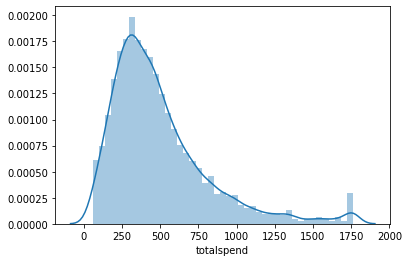

In [69]:
## Checking the linearity & distribution of target variable
import seaborn as sns
sns.distplot(creditcard_data_new.totalspend)

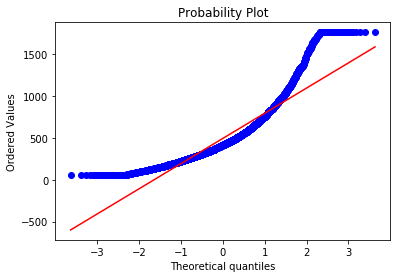

In [70]:
from scipy import stats
import pylab

stats.probplot(creditcard_data_new.totalspend, dist="norm", plot=pylab )
pylab.show()

#### With these plots(probplot and distplot) we can see that above target variable is not normally distributed(imperfections can be easily observed), 
#### So we will use BOXCOX technique to make this distibution normal.¶

In [71]:
########Points for using BOXCOX:

In [72]:
from scipy import stats

# transform training data & save lambda value
creditcard_data_new['bc_total_spend'],fitted_lambda = stats.boxcox(creditcard_data_new['totalspend'])

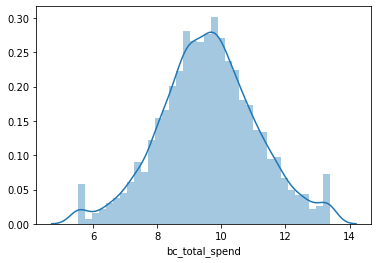

In [73]:
sns.distplot(creditcard_data_new.bc_total_spend)

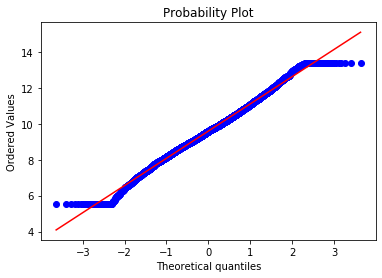

In [74]:
stats.probplot(creditcard_data_new.bc_total_spend, dist="norm", plot=pylab )
pylab.show()

##### NOW THE DATA IS ALMOST NORMALLY DISTRIBUTED 

In [75]:
#Dropping the y variables(totalspend) from dataframe
creditcard_data_new.drop(['totalspend'],axis=1,inplace=True)

# Modelling

#### Splitting the data into train and test:

In [76]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
creditcard_data_new = clean_dataset(creditcard_data_new)

In [77]:
feature_columns=creditcard_data_new.columns.difference(['bc_total_spend'])

In [78]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(creditcard_data_new[feature_columns],
                                              creditcard_data_new['bc_total_spend'],
                                              test_size=0.2,
                                              random_state=12)

In [79]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

4000
1000
4000
1000


### Feature Selection using SkLearn

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [81]:
fs = SelectKBest(score_func=f_regression, k='all')

In [82]:
fs.fit(x_train,y_train)

C:\Users\Ashish Singh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\Ashish Singh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Ashish Singh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Ashish Singh\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k='all', score_func=<function f_regression at 0x00000278A597C828>)

In [83]:
fs.scores_

array([4.93432415e-01, 7.85766741e+00, 1.04337344e+00, 9.15076366e-01,
       3.58545936e-03, 6.67047342e-03, 3.32721942e+00, 4.06001607e+00,
       1.85633988e+00, 2.92820605e+00, 2.51520795e+00, 6.50966971e-02,
       1.31345628e+00, 3.80705902e-01, 2.99041694e-02, 4.37476177e+00,
       1.02372607e+00, 2.48100219e-01, 9.34195034e-01, 4.77008499e-05,
       2.43138296e+00, 8.73747593e+00, 4.75719089e-02, 7.19272085e+00,
       3.01384385e-01, 6.48716181e-02, 1.01442965e+00, 7.09375408e-03,
       1.80703448e+00, 2.42715406e-01, 9.43274976e-01, 1.09943336e+00,
       7.34225540e-04, 4.62340587e-01, 1.22649578e+01, 1.27879870e+00,
       2.55492808e-01, 1.77499310e-02, 2.98908708e-01, 1.89440494e+00,
       4.63319059e-01, 3.43450226e-05, 2.67565390e+00, 8.57911801e-01,
       3.06849772e-02, 2.69018485e-02, 7.33036730e-01, 1.85949936e+00,
       2.85168163e-01, 1.08552828e+00, 1.91328549e-01, 1.87188850e+00,
       4.72556417e-02, 8.36577515e-01, 1.02967969e-02, 3.50644512e-01,
      

In [84]:
for i in feature_columns:
    print(i)

active_1
address_1
address_10
address_11
address_12
address_13
address_14
address_15
address_16
address_17
address_18
address_19
address_2
address_20
address_21
address_22
address_23
address_24
address_25
address_26
address_27
address_28
address_29
address_3
address_30
address_31
address_32
address_33
address_34
address_35
address_36
address_37
address_38
address_39
address_4
address_40
address_41
address_42
address_43
address_44
address_45
address_46
address_47
address_48
address_49
address_5
address_50
address_51
address_52
address_53
address_54
address_55
address_57
address_6
address_7
address_8
address_9
addresscat_2
addresscat_3
addresscat_4
addresscat_5
age
agecat_3
agecat_4
agecat_5
agecat_6
bfast_2
bfast_3
callcard_1
callid_1
callwait_1
carbought_0
carbought_1
carbuy_1
carcatvalue_1
carcatvalue_2
carcatvalue_3
card2_2
card2_3
card2_4
card2_5
card2benefit_2
card2benefit_3
card2benefit_4
card2fee_1
card2items
card2tenure_1
card2tenure_10
card2tenure_11
card2tenure_12
card2tenure_

In [85]:
feature_columns.shape

(390,)

In [86]:
for i in range(len(fs.scores_)):
    print('Feature {}: {}'.format (feature_columns[i], fs.scores_[i]))

Feature active_1: 0.49343241521580716
Feature address_1: 7.857667411060291
Feature address_10: 1.0433734367349805
Feature address_11: 0.9150763660731995
Feature address_12: 0.00358545935945299
Feature address_13: 0.006670473423739947
Feature address_14: 3.3272194212394375
Feature address_15: 4.060016071626843
Feature address_16: 1.856339880285364
Feature address_17: 2.9282060525327775
Feature address_18: 2.515207954493001
Feature address_19: 0.06509669708158737
Feature address_2: 1.313456280527129
Feature address_20: 0.38070590215800043
Feature address_21: 0.029904169431702196
Feature address_22: 4.3747617657367215
Feature address_23: 1.0237260680990754
Feature address_24: 0.24810021883143962
Feature address_25: 0.9341950336218069
Feature address_26: 4.770084987912127e-05
Feature address_27: 2.431382958981384
Feature address_28: 8.737475932517805
Feature address_29: 0.04757190889081331
Feature address_3: 7.192720851999193
Feature address_30: 0.3013843848630038
Feature address_31: 0.064

In [87]:
for i in range(len(fs.scores_)):
    print('Feature {}: {}'.format (feature_columns[i], fs.pvalues_[i]))

Feature active_1: 0.4824410597005989
Feature address_1: 0.005084954936595516
Feature address_10: 0.30709999894789564
Feature address_11: 0.3388289262827643
Feature address_12: 0.9522552328524689
Feature address_13: 0.9349108645743123
Feature address_14: 0.06821659641232615
Feature address_15: 0.043976898546634655
Feature address_16: 0.17312457046893978
Feature address_17: 0.0871217328089372
Feature address_18: 0.11283184256614373
Feature address_19: 0.7986276743990726
Feature address_2: 0.25183841967591974
Feature address_20: 0.5372608268371544
Feature address_21: 0.8627166028130355
Feature address_22: 0.03653787709359776
Feature address_23: 0.31169803146840963
Feature address_24: 0.6184433571800867
Feature address_25: 0.33383367725500757
Feature address_26: 0.9944897346924565
Feature address_27: 0.11900708473756155
Feature address_28: 0.0031355760453889332
Feature address_29: 0.8273546504557991
Feature address_3: 0.007350080702324754
Feature address_30: 0.5830464924865755
Feature addr

In [88]:
indices = np.argsort(fs.pvalues_)[::-1]
indices

array([275, 190, 274, 157,  41,  19,  71, 280, 362, 262,  32, 272, 178,
         4, 173,  94, 306, 199, 217,   5,  27, 375,  54, 109, 347, 311,
       207, 383, 341, 246, 101,  37, 196, 281, 136, 121, 168, 353, 340,
        45,  14, 282, 184,  44, 102, 298, 117, 343, 129, 270, 277, 299,
        52,  22, 135, 203,  25,  11, 235, 253, 201, 251, 268, 165, 349,
       159, 244, 111,  91, 229, 364, 346, 163, 263, 238, 214, 179, 146,
       233, 185, 342, 122, 344, 382, 355, 365, 220, 153, 115, 130,  50,
       267, 260, 305,  61, 360,  93, 161,  29,  17,  97,  36, 145,  48,
       162,  38,  24,  81,  99, 141, 206, 200,  55, 271, 380, 256, 197,
       208,  90,  13, 149, 210, 112,  60, 291, 234, 273,  95, 205, 373,
        33,  40, 169, 120,   0, 107, 154, 259, 172, 166, 350,  56, 105,
       216, 202, 180, 127, 160, 261,  46, 150,  89, 279, 138, 212, 144,
       164, 361, 142,  53,  43, 137, 252, 187, 188,  72,   3, 189,  18,
       351,  30, 100, 307, 192, 132,  26,  16,   2, 258, 151,  4

In [89]:
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'pvalues'] )
for f in range(x_train.shape[1]):
    feature_rank.loc[f] = [f+1,
                         x_train.columns[indices[f]],
                         fs.pvalues_[indices[f]]]

feature_rank

,rank,feature,pvalues
0,1,employ_49,NaN
1,2,cars_8,NaN
2,3,employ_48,NaN
3,4,cardtenure_30,9.954745e-01
4,5,address_46,9.953243e-01
5,6,address_26,9.944897e-01
6,7,carbought_0,9.918927e-01
7,8,employ_7,9.823619e-01
8,9,region_4,9.822352e-01
9,10,employ_37,9.802483e-01


### Selected feature >>> RandomForest

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid={'n_estimators':[10,25,50,100]}

tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)
tree.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=True),
             iid='deprecated', n_job

In [92]:
tree.best_params_

{'n_estimators': 100}

In [93]:
# we can take n_estimators': 100
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=100)
radm_clf.fit( x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [94]:
radm_clf.oob_score_

0.5722371325949803

In [95]:
radm_clf.feature_importances_

array([1.21514409e-03, 2.32393846e-04, 4.09340389e-04, 4.87947848e-04,
       2.78468418e-04, 3.47669033e-04, 4.87613679e-04, 3.37127623e-04,
       2.23135610e-04, 8.40422276e-04, 3.97526662e-04, 1.66747876e-04,
       3.26521792e-04, 7.36135603e-04, 2.20480870e-04, 4.38389523e-04,
       1.67157092e-04, 3.58297302e-04, 2.48283063e-04, 1.70851841e-04,
       3.47490258e-04, 1.07478572e-04, 1.59554639e-04, 4.77193217e-04,
       1.72639697e-04, 3.20731100e-04, 9.46138145e-05, 5.08910615e-05,
       8.20620760e-05, 1.29337935e-04, 1.22556607e-04, 2.36907559e-05,
       1.11799340e-04, 2.44911960e-06, 4.03692510e-04, 7.35398536e-05,
       2.97374473e-05, 4.74177249e-05, 3.16567475e-05, 4.06536271e-05,
       8.57444628e-05, 2.02262859e-05, 4.34631197e-05, 2.04430481e-05,
       6.95751476e-05, 5.79695456e-04, 2.60458059e-07, 7.52111599e-05,
       6.05692276e-06, 7.17719857e-06, 0.00000000e+00, 6.81133310e-07,
       7.52010911e-08, 2.04208525e-04, 6.18723790e-04, 2.89443466e-04,
      

In [96]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(x_train.shape[1]):
    feature_rank.loc[f] = [f+1,
                         x_train.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,card2items,2.720512e-01
1,2,carditems,2.160273e-01
2,3,lninc,5.973760e-02
3,4,income,5.768310e-02
4,5,carvalue,1.824866e-02
5,6,commutetime,1.027593e-02
6,7,hourstv,9.403838e-03
7,8,age,8.951287e-03
8,9,debtinc,8.420105e-03
9,10,lncreddebt,8.356928e-03


In [97]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [98]:
X_bef_scaling.columns

Index(['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'carditems', 'card2items', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv'], dtype='object')

In [99]:
%%capture
#gather features
features = "+".join(X_bef_scaling.columns)

In [100]:

features

'age+ed+income+lninc+debtinc+creddebt+lncreddebt+othdebt+lnothdebt+spoused+reside+pets+pets_cats+pets_dogs+pets_birds+pets_reptiles+pets_small+pets_saltfish+pets_freshfish+carvalue+commutetime+carditems+card2items+tenure+longmon+lnlongmon+longten+lnlongten+tollmon+lntollmon+tollten+lntollten+equipmon+lnequipmon+equipten+lnequipten+cardmon+lncardmon+cardten+lncardten+wiremon+lnwiremon+wireten+lnwireten+hourstv'

In [101]:
# get y and X dataframes based on this regression:
y, X = dmatrices('totalspend~' + features,custdata_df_num, return_type='dataframe')

In [102]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [103]:
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
0,1680.447819,Intercept
25,148.649752,longmon
27,117.189422,longten
12,108.225627,pets
19,89.025602,pets_freshfish
26,33.734078,lnlongmon
28,31.384703,lnlongten
43,24.447185,wireten
24,24.138424,tenure
31,22.290584,tollten


In [104]:
cred_data_corr=custdata_df_num.corr()
cred_data_corr

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,carditems,card2items,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,totalspend
age,1.000000,-0.093966,0.208286,0.142984,0.039031,0.142401,0.108046,0.154514,0.127005,-0.002796,-0.338338,0.026334,0.015743,0.013091,-0.013373,0.009332,0.002326,-0.003264,0.023500,0.175760,-0.056299,-0.025205,-0.009936,0.612014,0.468660,0.522203,0.499278,0.570673,0.106887,0.225450,0.263328,0.360473,-0.104212,0.094853,0.091553,0.267484,0.294774,0.149186,0.463020,0.430809,-0.025350,0.125988,0.108722,0.240545,-0.027318,0.031680
ed,-0.093966,1.000000,0.186802,0.206332,0.013871,0.122362,0.129920,0.135869,0.154458,0.113928,0.022048,0.031113,0.008898,0.026018,0.009812,-0.002268,0.012165,-0.005433,0.020688,0.157664,-0.008448,0.037741,-0.003078,-0.095077,-0.097377,-0.092285,-0.104004,-0.081866,0.018662,-0.010217,-0.013008,-0.028782,0.448759,0.110615,0.343854,0.038277,-0.039909,-0.012122,-0.080259,-0.052112,0.346476,0.108272,0.264967,0.034903,-0.009821,0.100943
income,0.208286,0.186802,1.000000,0.898172,0.011586,0.627578,0.531251,0.696227,0.597843,0.035491,-0.073381,0.008424,0.000656,0.022831,0.001840,-0.001956,-0.008239,-0.011377,0.005421,0.836840,-0.022752,0.036151,0.067919,0.237003,0.193649,0.215801,0.199000,0.232753,0.239705,0.202619,0.285782,0.225266,0.112048,0.150773,0.164405,0.154119,0.164969,0.083584,0.196910,0.166795,0.215101,0.161137,0.253034,0.187607,0.055100,0.377200
lninc,0.142984,0.206332,0.898172,1.000000,0.013177,0.566972,0.583808,0.636798,0.666062,0.045417,-0.057788,0.005846,0.002866,0.014187,0.010130,0.003615,0.010353,-0.011349,-0.000392,0.801938,-0.025583,0.070062,0.079903,0.193285,0.131747,0.164161,0.134973,0.197052,0.226744,0.169380,0.254969,0.201281,0.125839,0.143116,0.159243,0.140092,0.137613,0.067728,0.149012,0.138648,0.217838,0.143650,0.237561,0.163657,0.108643,0.396852
debtinc,0.039031,0.013871,0.011586,0.013177,1.000000,0.462598,0.552941,0.526964,0.628006,-0.040150,-0.026233,-0.002531,0.001028,-0.003278,-0.011250,0.016423,0.009945,0.017582,-0.005829,0.014134,0.000729,0.007511,0.010382,0.018607,0.012266,0.011736,0.014531,0.018344,-0.008189,0.016447,0.005262,0.025155,-0.001188,0.020629,0.011433,0.023642,0.012167,0.004043,0.015897,0.018426,-0.000041,0.007495,0.008982,0.021020,-0.011577,0.015066
creddebt,0.142401,0.122362,0.627578,0.566972,0.462598,1.000000,0.774923,0.640411,0.558549,0.002226,-0.051607,-0.009922,-0.005702,0.010320,-0.004893,0.005487,-0.002966,0.006549,-0.012296,0.520346,-0.013469,0.018668,0.055378,0.149706,0.124080,0.134135,0.128357,0.143929,0.134832,0.129462,0.170792,0.138525,0.060931,0.085181,0.103360,0.095863,0.103600,0.044606,0.121262,0.101926,0.112889,0.089753,0.142524,0.111997,0.032770,0.248547
lncreddebt,0.108046,0.129920,0.531251,0.583808,0.552941,0.774923,1.000000,0.556191,0.675488,0.005571,-0.048184,-0.009826,-0.002673,0.002020,0.005592,0.010138,0.003218,-0.001504,-0.011215,0.465087,-0.030544,0.043866,0.061031,0.118749,0.083114,0.096313,0.086710,0.115859,0.105030,0.094021,0.131389,0.117120,0.073346,0.089236,0.101886,0.089065,0.071364,0.023574,0.084287,0.076669,0.113947,0.082814,0.133143,0.098592,0.040356,0.247802
othdebt,0.154514,0.135869,0.696227,0.636798,0.526964,0.640411,0.556191,1.000000,0.807236,0.016854,-0.054565,0.011681,0.008950,0.008595,-0.003970,0.006150,-0.003381,0.003894,0.007740,0.600102,-0.013573,0.032282,0.046935,0.181624,0.141451,0.159064,0.147392,0.175721,0.168214,0.156408,0.205918,0.173255,0.080956,0.128476,0.125057,0.124602,0.122684,0.062028,0.146995,0.128973,0.162845,0.134204,0.194315,0.152244,0.035490,0.272972
lnothdebt,0.127005,0.154458,0.597843,0.666062,0.628006,0.558549,0.675488,0.807236,1.000000,0.004438,-0.070194,0.007919,0.015755,0.003984,-0.002

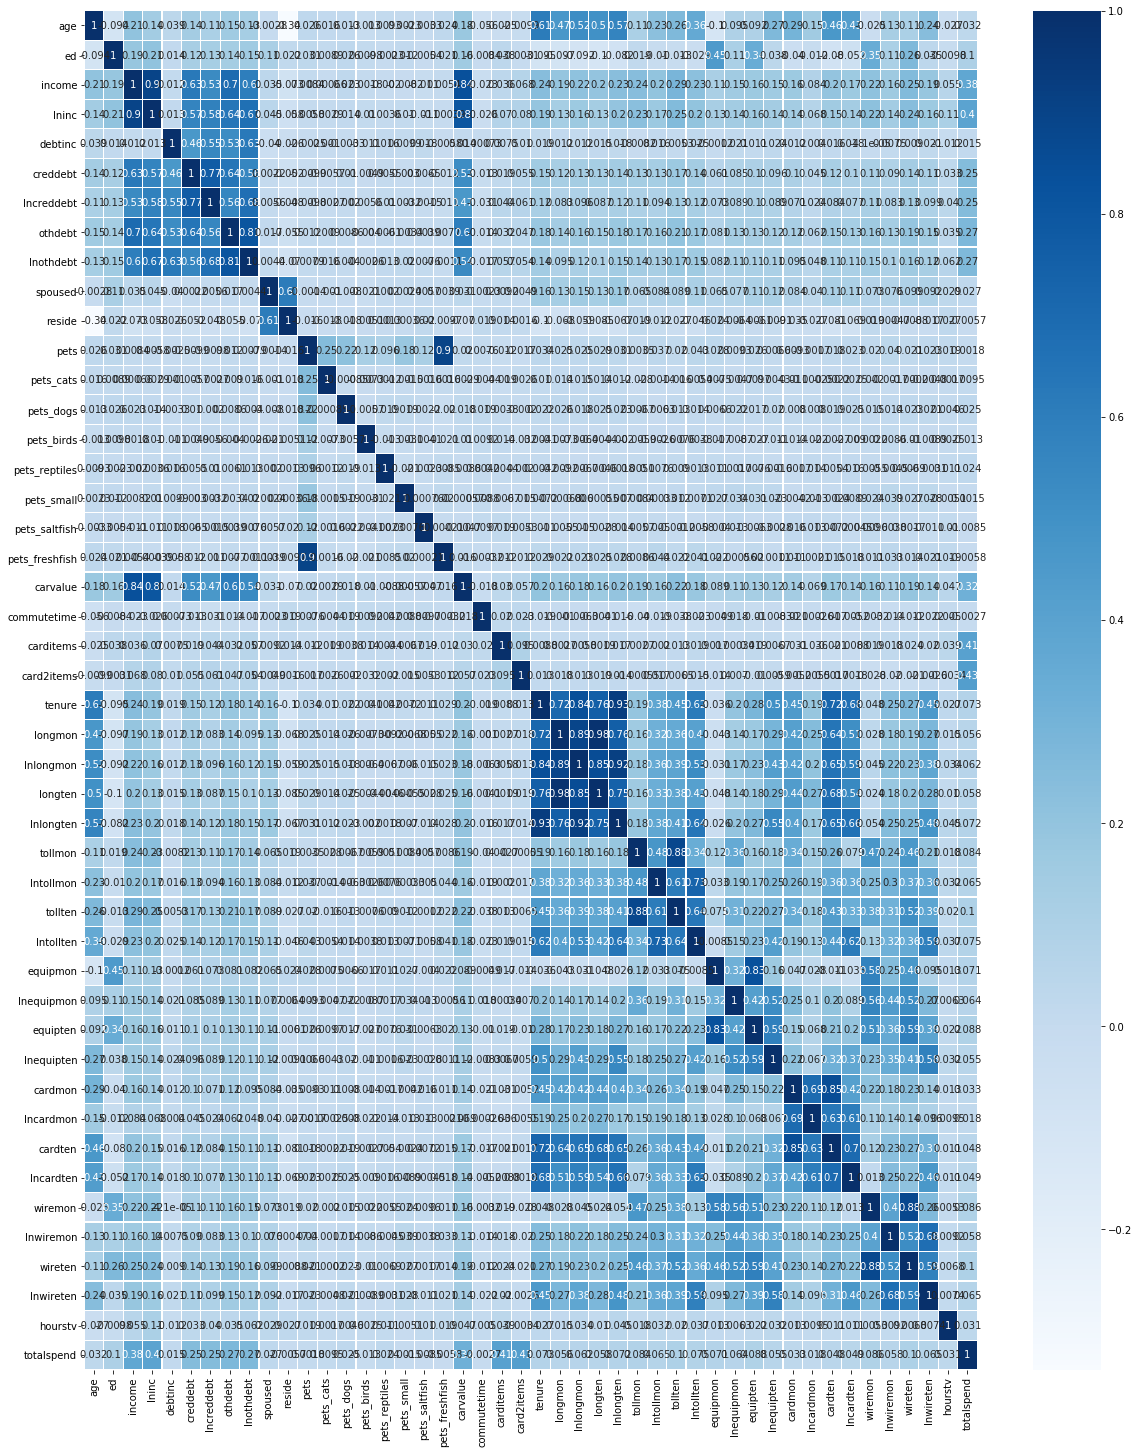

In [105]:
plt.figure(figsize=(20,25))
# heatmap
sns.heatmap(cred_data_corr, cmap="Blues", annot=True,linewidths=0.1)
plt.show()